In [1]:
%matplotlib inline
from avni.api.client import Client as avapi
from avni.api.model import Model
import matplotlib.pyplot as plt 
import numpy as np 
conn=avapi()


avni api is live at 
http://127.0.0.1:5000
API Key validated


In [2]:
ModelInstance=Model(conn)

In [3]:
model_list=ModelInstance.listModels()
model_list

{'3d': {'available': ['S362ANI+M', 'S40RTS'],
  'details': {'S362ANI+M': {'parameters': ['vs', 'vsh', 'vsv'],
    'vs': {'refmodel': 'STW105',
     'description': 'Voigt-averaged Shear-Wave Velocity',
     'absolute_unit': 'm/s',
     'unit': 'percent'},
    'vsh': {'refmodel': 'STW105',
     'description': 'Horizontally polarized Shear-Wave Velocity',
     'absolute_unit': 'm/s',
     'unit': 'percent'},
    'vsv': {'refmodel': 'STW105',
     'description': 'Vertically polarized Shear-Wave Velocity',
     'absolute_unit': 'm/s',
     'unit': 'percent'},
    'kernel': 'BOX25km_PIX1X1'},
   'S40RTS': {'parameters': ['vp', 'vs', 'rho'],
    'vp': {'refmodel': 'PREM',
     'description': 'Vp anomaly scaled from Vs',
     'absolute_unit': 'm/s',
     'unit': 'percent'},
    'vs': {'refmodel': 'PREM',
     'description': 'Voigt-averaged Shear-Wave Velocity anomaly',
     'absolute_unit': 'm/s',
     'unit': 'percent'},
    'rho': {'refmodel': 'PREM',
     'description': 'density anomaly sca

In [4]:
model_list['3d']['available']

['S362ANI+M', 'S40RTS']

In [5]:
model_list['3d']['details']['S362ANI+M']

{'parameters': ['vs', 'vsh', 'vsv'],
 'vs': {'refmodel': 'STW105',
  'description': 'Voigt-averaged Shear-Wave Velocity',
  'absolute_unit': 'm/s',
  'unit': 'percent'},
 'vsh': {'refmodel': 'STW105',
  'description': 'Horizontally polarized Shear-Wave Velocity',
  'absolute_unit': 'm/s',
  'unit': 'percent'},
 'vsv': {'refmodel': 'STW105',
  'description': 'Vertically polarized Shear-Wave Velocity',
  'absolute_unit': 'm/s',
  'unit': 'percent'},
 'kernel': 'BOX25km_PIX1X1'}

In [6]:
model_evaluation=ModelInstance.evaluate_points({'lat':42.2,'lon':232.0,'depth':80.0})
model_evaluation

{'parameter': 'vs', 'vs': [-3.0920062812660314], 'call_complete': True}

In [7]:
lat=np.linspace(45.0,60.0,10)
dep=np.ones(lat.shape)*150
lon=np.ones(lat.shape)*15
args={'lat':lat,'lon':lon,'depth':dep}
print("\nModel Evaluation of 1d numpy arrays")
model_evaluation=ModelInstance.evaluate_points(args)
print('vs='+str(model_evaluation['vs']))


Model Evaluation of 1d numpy arrays
vs=[0.52022973 0.81500248 1.45612725 2.17834252 2.61961448 3.37836009
 4.05269663 4.24362419 4.5301535  4.68938139]


In [8]:
# get some depth profiles
args={'lat':42.2,'lon':232.0}
depth_profile=ModelInstance.depthProfile(args)

In [9]:
depth_profile.keys()

dict_keys(['parameter', 'vs', 'depth', 'call_complete'])

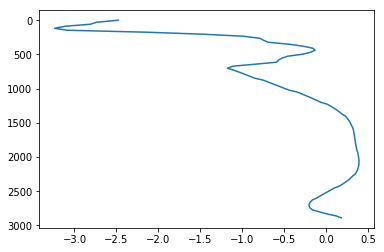

In [10]:
f=plt.figure()
plt.plot(depth_profile['vs'],depth_profile['depth']);
plt.gca().invert_yaxis()

In [11]:
args['model']='S40RTS'
depth_profile_2=ModelInstance.depthProfile(args)

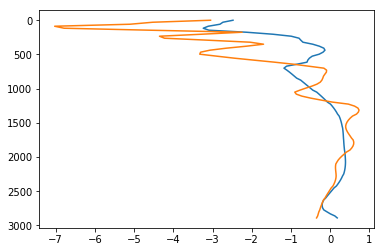

In [12]:
f=plt.figure()
plt.plot(depth_profile['vs'],depth_profile['depth']);
plt.plot(depth_profile_2['vs'],depth_profile['depth']);
plt.gca().invert_yaxis()


depth profile with defaults

depth profile specified depth range


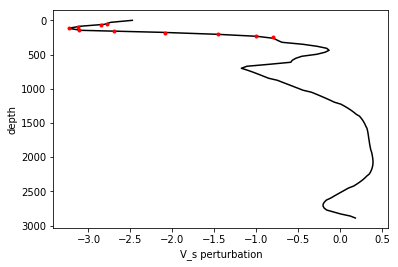

In [13]:
# get some depth profiles
print("\ndepth profile with defaults")
args={'lat':42.2,'lon':232.0}
depth_profile=ModelInstance.depthProfile(args)

print("\ndepth profile specified depth range")
args={'lat':42.2,'lon':232.0,'depthMin':50,'depthMax':250,'N_depth':10}
depth_profile_2=ModelInstance.depthProfile(args)

ax=plt.axes()
ax.plot(depth_profile['vs'],depth_profile['depth'],'k')
ax.plot(depth_profile_2['vs'],depth_profile_2['depth'],'.r')
ax.invert_yaxis()
ax.set_xlabel('V_s perturbation')
ax.set_ylabel('depth')
plt.show()

In [27]:
gcdelta=100.0;
args={'lat':42.2,'lon':232.0,'azimuth':80.0,'gcdelta':gcdelta}

# optional args:
args['radius_min_km']=6371-50.
args['radius_max_km']=6371-200.
args['quickInterp']=1
xs=ModelInstance.crossSection(args)


quick interp crossection


In [41]:
xs.keys()

dict_keys(['vs', 'parameter', 'lat', 'lon', 'depth', 'call_complete', 'theta'])

In [43]:
xs['vs'].shape

(200, 200)

In [45]:
xs['theta'].shape

(200,)

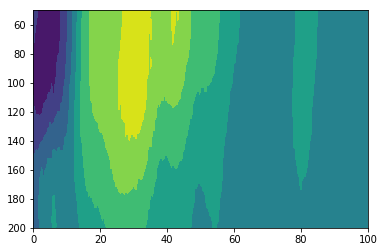

In [48]:
plt.contourf(xs['theta'],xs['depth'],xs['vs'])
plt.gca().invert_yaxis()

## fixed depth

Fetching whole earth fixed depth
Fetching N. America fixed depth
Fetching N. America fixed depth, model 2


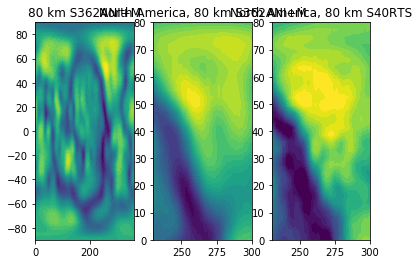

In [49]:
# evaluate model at a fixed depth, whole earth
print("Fetching whole earth fixed depth")
result=ModelInstance.fixedDepth({'depth':80.0})
plt.figure()
plt.subplot(1,3,1)
plt.contourf(result['lon'],result['lat'],result['vs'],30)
cR=[]
cR.append(np.min(result['vs']))
cR.append(np.max(result['vs']))
plt.clim(cR)
plt.title('80 km '+result['input_args']['model'])

# limit the lat/lon ranges at fixed depth for N. America, adjust resolution
args={
    'depth':80.0,'lat1':0.,'lat2':80,'lon1':-130,'lon2':-60,
    'Nlat':30,'Nlon':80
    }
print("Fetching N. America fixed depth")
result=ModelInstance.fixedDepth(args)
plt.subplot(1,3,2)
plt.contourf(result['lon'],result['lat'],result['vs'],30)
plt.clim(cR)
plt.title('North America, 80 km '+result['input_args']['model'])

# use a different model
# limit the lat/lon ranges at fixed depth for N. America, adjust resolution
args['model']='S40RTS'
print("Fetching N. America fixed depth, model 2")
result2=ModelInstance.fixedDepth(args)
plt.subplot(1,3,3)
plt.contourf(result2['lon'],result2['lat'],result2['vs'],30)
plt.clim(cR)
plt.title('North America, 80 km '+result2['input_args']['model'])


plt.show()